In [1]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
image = cv2.imread('3-people.jpg')

In [3]:
def thermal(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = ~image    # inverting image
    
    heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    return heatmap


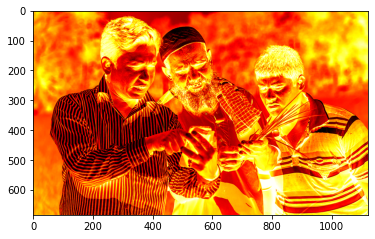

In [4]:
hm = thermal(image)
plt.imshow(hm)


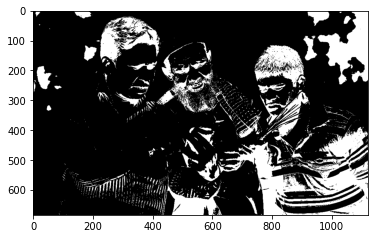

In [18]:
def binary_threshold(heatmap):
    heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
    ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)

    return binary_thresh

bt = binary_threshold(hm)
plt.imshow(bt, cmap='gray')

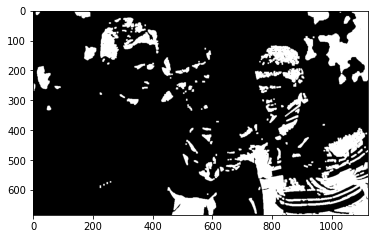

In [11]:
def erode_dilate(binary_thresh):
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
    image_opening = cv2.dilate(image_erosion, kernel, iterations=1)
    return image_opening

ed = erode_dilate(bt)
plt.imshow(ed, cmap='gray')

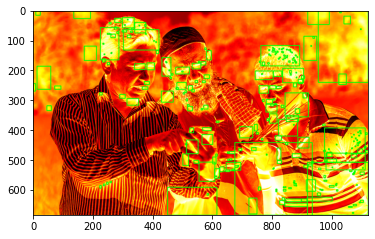

In [12]:
# Get contours from the image obtained by opening operation
def contours_rectangle(image_opening):
    contours, _ = cv2.findContours(image_opening, 1, 2)
    
    image_with_rectangles = np.copy(hm)
    
    for contour in contours:
        # rectangle over each contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw rectangles for visualisation
        image_with_rectangles = cv2.rectangle(image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return image_with_rectangles

image_with_rectangles = contours_rectangle(ed)
plt.imshow(image_with_rectangles)